<a href="https://colab.research.google.com/github/PhoenixCC0722/Journey_to_become_DataScientist/blob/main/Kopie_von_Categories_Eniac_Group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# orders_qu.csv
url = "https://drive.google.com/file/d/1CxCz2wZJW_iks67oT5GafrQWI8yAUBVW/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1nt92yDfR2GV2zsFWNnGm6lqyO3O_Zn_j/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)

# products_qu.csv
url = "https://drive.google.com/file/d/1vgRjkSM5BuND4YGJTEgqmWempgyGtT99/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)

# brands_cl.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [4]:
b_df = brands.copy()
ol_df = orderlines.copy()
o_df = orders.copy()
p_df = products.copy()

In [5]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_rows", 1000)

In [6]:
# Change data type to datetime:

ol_df["date"] = pd.to_datetime(ol_df["date"])
o_df["created_date"] = pd.to_datetime(o_df["created_date"])

In [7]:
### Download csv file:

#Jupyter Lab:
#from IPython.display import FileLink
#df.to_csv("df.csv", index=False)
#files.download("df.csv")

#Google Colab:
#from google.colab import files
#df.to_csv("df.csv", index=False)
#files.download("df.csv")

### Changes

**products table:**
- Add discount column:

  Discounts are defined as the difference between orderlines.unit_price and products.price

  Code:
  p_ol_df = p_df.merge(ol_df, how="outer", left_on="sku", right_on="sku")
  p_ol_df["discount"] = p_ol_df["price"] - p_ol_df["unit_price"]
  p_df["discount"] = p_ol_df["discount"]

(Kathrin)

##Categories

In [8]:
p_category_df = p_df.copy()

In [9]:
p_category_df["category"] = ""

In [10]:
p_category_df.head()

,sku,name,desc,price,in_stock,type,discount,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,5.00,
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,10.00,
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,10.00,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,5.00,
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,5.00,


In [11]:
from wordcloud import WordCloud

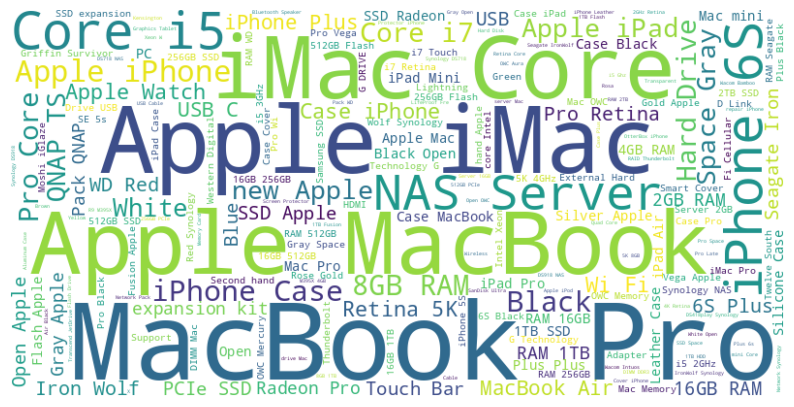

In [12]:

# Concatenate text data from the "name" and "desc" columns into a single string
text = ' '.join(p_category_df['name'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

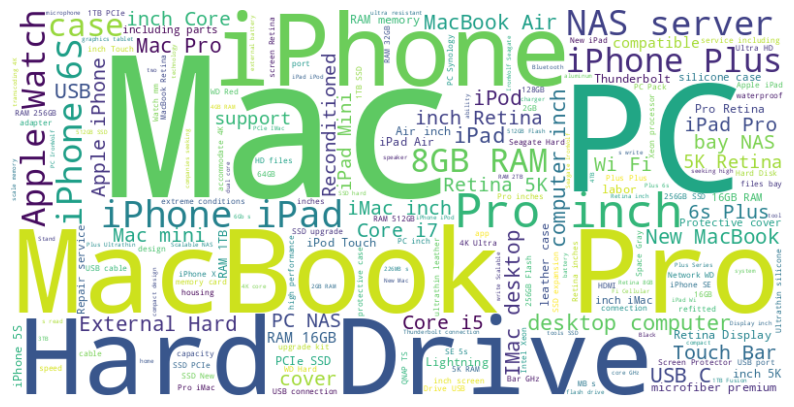

In [13]:
# Concatenate text data from the "name" and "desc" columns into a single string
text = ' '.join(p_category_df['desc'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already generated the word cloud as described in your code

# Access the word counts from the word cloud
word_counts_from_wordcloud = wordcloud.words_

# Convert word counts dictionary to a list of words
words_list = list(word_counts_from_wordcloud.keys())

# Display the list of words
print("List of words from the word cloud:")
print(words_list)

List of words from the word cloud:
['Mac', 'PC', 'MacBook Pro', 'Hard Drive', 'iPhone', 'Pro inch', 'iPhone iPad', 'iPhone 6S', 'NAS server', '8GB RAM', 'iPhone Plus', 'Apple Watch', 'case', 'desktop computer', 'iPad', 'New MacBook', 'IMac desktop', 'External Hard', 'computer inch', 'USB C', 'USB', 'MacBook Air', 'iPod', 'Mac Pro', 'Core i7', 'Mac mini', 'Wi Fi', 'bay NAS', 'Retina 5K', 'inch Core', 'PC NAS', '6s Plus', 'Touch Bar', 'iMac inch', 'Apple iPhone', 'iPad Pro', 'cover', 'inch Retina', 'Core i5', '5K Retina', 'support', 'Reconditioned', 'iPad Mini', 'compatible', 'RAM 16GB', 'microfiber premium', 'leather case', 'Retina Display', 'Thunderbolt', 'Air inch', 'iPod Touch', 'PCIe SSD', 'RAM 1TB', 'inch 5K', 'iPad Air', 'Pro Retina', 'labor', 'Lightning', 'iPhone 5S', 'RAM memory', 'including parts', 'inch iMac', 'Repair service', '16GB RAM', 'silicone case', 'Protective cover', 'service including', 'USB connection', 'Plus Plus', '16GB', 'inch screen', 'adapter', 'HDMI', 'Seagate

#Our Cathegories:

In [15]:
# Tokenize the words in the description column
p_category_df['tokens'] = p_category_df['desc'].str.lower().str.split() + p_category_df['name'].str.lower().str.split()

# Define categories based on specific words or patterns
categories = {
    "accessories": ["adonit", "stabilizer", "intuos", "bamboo", "backpack", "case", "cover", "retina", "protective cover", "silicone case", "leather case", "screen protector", "stand", "support", "sliding", "headset", "controller", "remote", "mouse", "speakers", "printer", "microphone", "cameras", "glasses", "speaker", "speakers.", "artpen", "pen", "pencil", "camera", "padlock", "trackpad", "headphones", "keyboard"],
    "storage": ["12tb", "bays", "seagate", "san", "nas", "synology", "pcie", "8gb", "ram", "16gb", "32gb", "64gb", "128gb", "256gb", "ssd", "512gb", "1tb", "2tb ram", "3tb", "4tb", "1tb pcie", "1tb fusion", "hard drive", "external hard drive", "drive", "nas server"],
    "apple products": ["xmac", "watch", "ipod", "pro inch", "pro inches plus", "plus series", "space gray", "black", "27-inch", "monitor", "7", "6s","6s plus", "se", "x", "new macbook", "macbook", "ipad mini", "ipad air", "ipad pro", "imac", "cinema"],
    "connectivity": ["thunderbolt", "charging", "powercube", "router", "satellite", "capsule", "dlink", "connection.", "av", "connector", "adapter", "wi-fi", "thunderbolt connection", "usb connection", "usb", "network", "ethernet", "bluetooth", "pcie imac", "adapter", "cable", "usb cable", "lightning cable", "hdmi cable", "charger"]
}

# Function to assign categories based on words
def assign_category(tokens):
    for token in tokens:
        for category, keywords in categories.items():
            if token in keywords:
                return category
    return 'other'

# Assign categories to each description
p_category_df['category'] = p_category_df['tokens'].apply(assign_category)

In [16]:
#Category Changes: All apple products All accessories Computer comp to other


In [17]:
pd.set_option('display.max_colwidth', None)

In [ ]:
filtered_df = p_category_df[(p_category_df["category"] == "other") & (p_category_df["price"] <= 100) & (p_category_df["price"] >= 10)]
filtered_df.head(1000)


In [19]:
p_category_df.groupby("category").agg({"sku":"count", "price":"sum"})

,sku,price
category,,
accessories,2528,223794.66
apple products,2613,3596942.95
connectivity,1714,468526.45
other,453,45561.44
storage,2684,2333298.41


In [20]:
category_summary1 = p_category_df.groupby("category").agg({"sku":"count", "price":"sum"})

# Calculate the total price across all categories
total_price = category_summary1["price"].sum()

# Calculate the percentage of price for each category
category_summary1["price_percentage"] = (category_summary1["price"] / total_price) * 100

In [21]:
## Get revenue: price * product quantity of sku
# Merge ol_df & p_category_df
ol_p_category_df = ol_df.merge(p_category_df, how="right", left_on="sku", right_on="sku")
ol_p_category_df_grouped = ol_p_category_df.groupby("sku").agg({"product_quantity":"sum", "price":"first", "category":"first"})


ol_p_category_df_grouped["revenue"] = ol_p_category_df_grouped["product_quantity"] * ol_p_category_df_grouped["price"]
ol_p_category_df_grouped.reset_index(inplace=True)


In [22]:
category_summary2 = ol_p_category_df_grouped.groupby("category").agg({"sku":"count", "revenue":"sum"}).reset_index()

# Calculate the total price across all categories
total_price = category_summary2["revenue"].sum()

# Calculate the percentage of price for each category
category_summary2["revenue_percentage"] = (category_summary2["revenue"] / total_price) * 100

In [23]:
category_summary2

,category,sku,revenue,revenue_percentage
0,accessories,2528,1044113.58,11.18
1,apple products,2613,2330064.24,24.94
2,connectivity,1714,1634651.33,17.50
3,other,453,309127.00,3.31
4,storage,2684,4024470.71,43.08


# Based on the category_summary2, make a pie chart of this 5 categories

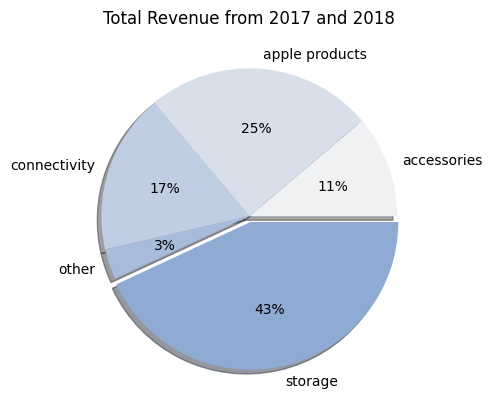

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

#define Seaborn color palette to use
colors = sns.light_palette("#79C")[0:5]
explode = (0, 0, 0, 0, 0.04)
#create pie chart
plt.pie(x=category_summary2['revenue_percentage'], labels =category_summary2['category'], colors = colors, shadow=True, explode=explode, autopct='%.0f%%')
plt.title("Total Revenue from 2017 and 2018")
plt.show()

# Yearly Revenue of each category in 2017 and 2018

The datetime column is in the dataset order? or orderline?

In [ ]:
ol_p_category_df.head() #date
ol_p_category_df.info() #date -- datetime64

In [35]:
category_summary2.head()  # --> ol_p_category_df_grouped

,category,sku,revenue,revenue_percentage
0,accessories,2528,1044113.58,11.18
1,apple products,2613,2330064.24,24.94
2,connectivity,1714,1634651.33,17.50
3,other,453,309127.00,3.31
4,storage,2684,4024470.71,43.08


In [45]:
ol_p_category_df_grouped.head() # --> ol_p_category_df

,sku,product_quantity,price,category,revenue
0,8MO0001-A,1.00,35.00,connectivity,35.00
1,8MO0003-A,1.00,35.00,connectivity,35.00
2,8MO0007,7.00,35.00,connectivity,245.00
3,8MO0008,11.00,35.00,connectivity,385.00
4,8MO0009,5.00,35.00,connectivity,175.00


In [ ]:
ol_p_category_df.head()
list(ol_p_category_df.columns)
"""
--> ['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price', 'date',
 'name', 'desc', 'price', 'in_stock', 'type', 'discount', 'category', 'tokens']
 """
list(ol_p_category_df_grouped.columns)
# -->['sku', 'product_quantity', 'price', 'category', 'revenue']
list(category_summary2.columns)
# --> ['category', 'sku', 'revenue', 'revenue_percentage']

Now we want to calculate the yearly revenue in 2017 and 2018, then we have to include the 'date' in the ol_p_category_df

In [ ]:
# ol_p_category_df = ol_df.merge(p_category_df, how="right", left_on="sku", right_on="sku")
# ol_p_category_df_grouped = ol_p_category_df.groupby("sku").agg({"product_quantity":"sum", "price":"first", "category":"first"})
#ol_df.info()
#ol_p_category_df.info() # 'date' is already a datetime64
ol_p_category_df["year"] = ol_df.date.dt.year
ol_p_category_df_grouped_by_year = ol_p_category_df.groupby(["sku","year"]).agg({"product_quantity":"sum", "price":"first", "category":"first"}).reset_index()
ol_p_category_df_grouped_by_year.head()

In [48]:
ol_p_category_df_grouped_by_year["revenue"] = ol_p_category_df_grouped_by_year["product_quantity"] * ol_p_category_df_grouped_by_year["price"]
ol_p_category_df_grouped_by_year.reset_index(inplace=True)

Now category_summary2 will change to category_summary2_by_year and trying to make the same Pie Chart

In [56]:
category_summary2_by_year = ol_p_category_df_grouped_by_year.groupby(["year","category"]).agg({"sku":"count", "revenue":"sum"}).reset_index()

# Calculate the total price across all categories
total_price = category_summary2_by_year["revenue"].sum()

# Calculate the percentage of price for each category
category_summary2_by_year["revenue_percentage"] = (category_summary2_by_year["revenue"] / total_price) * 100

In [61]:
category_summary2_by_year.tail()

,year,category,sku,revenue,revenue_percentage
5,2018.00,accessories,442,205972.36,2.38
6,2018.00,apple products,732,1041762.99,12.05
7,2018.00,connectivity,292,443187.03,5.13
8,2018.00,other,63,47552.10,0.55
9,2018.00,storage,641,1143137.75,13.22


In [68]:
category_summary2_2017 = category_summary2_by_year.loc[category_summary2_by_year.year == 2017]

In [69]:
category_summary2_2017

,year,category,sku,revenue,revenue_percentage
0,2017.00,accessories,1714,716067.54,8.28
1,2017.00,apple products,1492,1130189.77,13.07
2,2017.00,connectivity,1156,1042731.18,12.06
3,2017.00,other,339,192900.59,2.23
4,2017.00,storage,1825,2682790.49,31.03


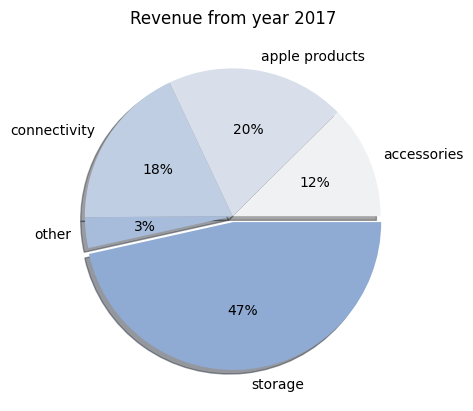

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
#define Seaborn color palette to use
colors = sns.light_palette("#79C")[0:5]
explode = (0, 0, 0, 0, 0.04)
#create pie chart
plt.pie(x=category_summary2_2017['revenue_percentage'], labels =category_summary2_2017['category'], colors = colors, shadow=True, explode=explode, autopct='%.0f%%')
plt.title("Revenue from year 2017")
plt.show()

# 2018 only three months data!!! Now to find out the maximal date and the minimum date

In [75]:
ol_p_category_df.head()
print(ol_p_category_df.date.max(),ol_p_category_df.date.min(), sep="\n")

2018-03-14 11:58:13
2017-01-01 01:46:16


Grap the date from the first three months and then compare with year and category

In [26]:
category_summary2 = ol_p_category_df_grouped.groupby("category").agg({"sku":"count", "revenue":"sum"}).reset_index()

# Calculate the total price across all categories
total_price = category_summary2["revenue"].sum()

# Calculate the percentage of price for each category
category_summary2["revenue_percentage"] = (category_summary2["revenue"] / total_price) * 100

In [22]:
category_summary1

,sku,price,price_percentage
category,,,
accessories,2528,223794.66,3.36
apple products,2613,3596942.95,53.94
connectivity,1714,468526.45,7.03
other,453,45561.44,0.68
storage,2684,2333298.41,34.99


In [34]:
p_category_df.head()

,sku,name,desc,price,in_stock,type,discount,category,tokens
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,5.00,accessories,"[aluminum, support, compatible, with, all, macbook, silver, rain, design, mstand, support]"
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,10.00,connectivity,"[usb, ultrathin, keyboard, apple, mac, spanish., apple, mac, keyboard, keypad, spanish]"
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,10.00,accessories,"[mouse, apple, usb, cable., mighty, mouse, apple, mouse, for, mac]"
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,5.00,connectivity,"[iphone, dock, and, usb, cable, apple, ipod., apple, dock, to, usb, cable, iphone, and, ipod, white]"
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pro (2006/07/08).,34.99,1,1364,5.00,storage,"[2gb, ram, mac, mini, and, imac, (2006/07), macbook, pro, (2006/07/08)., mac, memory, kingston, 2gb, 667mhz, ddr2, so-dimm]"


In [28]:
p_category_df.groupby("in_stock")["sku"].count()

in_stock
0    8000
1    1992
Name: sku, dtype: int64

In [29]:
p_category_df.shape

(9992, 9)

In [30]:
ol_df.shape

(53231, 7)

In [31]:
ol_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


In [32]:
products_qu = p_category_df.drop(columns=["tokens"])

In [33]:
#Google Colab:
from google.colab import files
products_qu.to_csv("products_qu.csv", index=False)
files.download("products_qu.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>